# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)





3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)


4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




# Solucion 

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

\begin{equation}
f(x) = e^{x} - 2 - \cos(e^x-2) 
\end{equation}

In [ ]:
#librerias 
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

In [ ]:
g = lambda x: np.exp(x)-2
h = lambda x: np.cos( np.exp(x)-2)
f = lambda x: g(x) - h(x)

In [ ]:
x = np.linspace(-2, 2, 100)

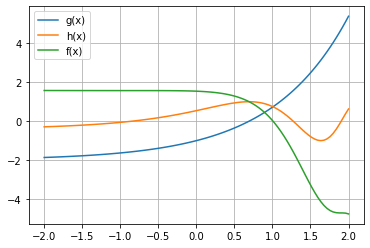

In [ ]:
plt.plot(x, g(x), label="g(x)")
plt.plot(x, h(x), label="h(x)")
plt.plot(x, h(x)-g(x), label="f(x)")
plt.grid()
plt.legend()

In [ ]:
root = optimize.bisect(f, 1, 4)
print({root})

{1.007623971657722}


In [ ]:
# Metodo Newton Rapshod
root2 = optimize.newton(f, 3)
print({root})


{1.007623971657722}


In [ ]:
root-root2

-4.147793219999585e-13

Punto 2.

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

\begin{equation}
f(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) 
\end{equation}



In [ ]:
f = lambda omega : 2*omega**2 * (0.51+np.sin(omega))
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega))

h = lambda omega : f(omega)-g(omega)
omega = np.linspace(-np.pi/4, np.pi/4)


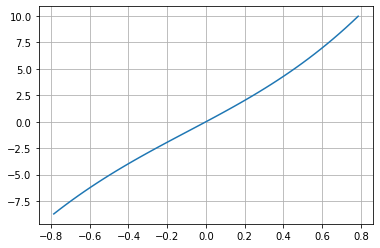

In [ ]:
plt.figure()
plt.plot(omega, h(omega) )
plt.grid()

In [ ]:
root = optimize.newton(h, 2)
print({root})

{6.113797822835222e-17}


3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)

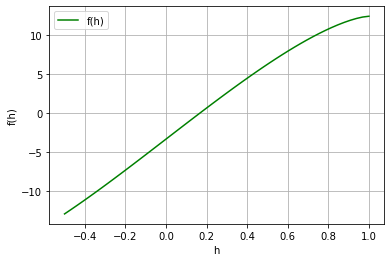

La profundidad del agua es 0.8338339653422736 pies


In [8]:
#Librerias
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


def f(h): #Se define una función para h en términos de L,R Y V
    L=10 #pies
    r=1 #pie
    v=12.4 #pies^3
    return v-L*((0.5*np.pi*r**2)-(np.arcsin(h/r)*r**2)-(h*(r**2-h**2)**0.5))



h=np.linspace(-0.5,1,50) #Arreglo con valores de h para evaluar en la función 
plt.plot(h,f(h),"g-", label=('f(h)')) #Se grafica f(h) para ver el intervalo [a,b]  tal que f(a)f(b)<0
plt.xlabel('h')
plt.ylabel('f(h)')
plt.legend()
plt.grid()
plt.show()

root= optimize.bisect(f,0,0.3) #Se halla el cero de f(h) con scipy
profundidad = 1-root #Del grafico se ve que la profundidad del agua es r-h
print("La profundidad del agua es {} pies".format(profundidad))

4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.


La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indica el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)


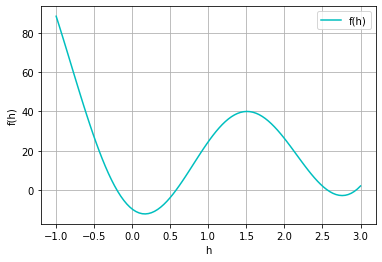

La raiz en radianes con el metodo de Newton es 0.5754730121943986 y en grados 32.972174822419596
La raiz en radianes con el metodo de la biseccion es 0.5754730121940158 y en grados 32.97217482239766


In [11]:
#Librerias
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#Funcion que describe la falla por rozamiento en terminos de alpha(angulo maximo)
def f(alpha):
    L= 89 #pulgadas
    h= 49 #pulgadas
    D= 55 #pulgadas
    beta= np.deg2rad(11.5) 
    
    #Expresiones dadas en el enunciado
    A=L*np.sin(beta)
    B=L*np.cos(beta)
    C=(h+0.5*D)*np.sin(beta)-(0.5*D*np.tan(beta))
    E=(h+0.5*D)*np.cos(beta)-(0.5*D)
    
    return (A*np.sin(alpha)*np.cos(alpha))+(B*(np.sin(alpha))**2)-(C*np.cos(alpha))-(E*np.sin(alpha)) 


alpha=np.linspace(-1,3,100) #Arreglo de valores de alpha para evaluar en la funcion 
plt.plot(alpha,f(alpha),"c-", label=('f(h)')) #Grafica para determinar al intervalo [a,b] tal que f(a)f(b)<0
plt.xlabel('h')
plt.ylabel('f(h)')
plt.legend()
plt.grid()
plt.show()


#Se encuentra la raiz con el metodo de newton
root=optimize.newton(f,0.5)
#Se encuentra la raiz con el metodo de bisección
root2=optimize.bisect(f,0.1,1) 
print("La raiz en radianes con el metodo de Newton es {} y en grados {}".format(root,np.rad2deg(root)))
print("La raiz en radianes con el metodo de la biseccion es {} y en grados {}".format(root2,np.rad2deg(root2)))





5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image


In [ ]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [ ]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [ ]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


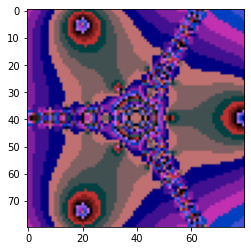

In [ ]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
